In [ ]:
!pip install tensorflow==2.2.0rc0

In [ ]:
import tensorflow as tf
if not tf.__version__ == '2.2.0-rc0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0-rc0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [ ]:
!rm watsoniotp.*
!wget https://raw.githubusercontent.com/romeokienzler/developerWorks/master/lorenzattractor/watsoniotp.healthy.phase_aligned.pickle
!wget https://raw.githubusercontent.com/romeokienzler/developerWorks/master/lorenzattractor/watsoniotp.broken.phase_aligned.pickle
!mv watsoniotp.healthy.phase_aligned.pickle watsoniotp.healthy.pickle
!mv watsoniotp.broken.phase_aligned.pickle watsoniotp.broken.pickle

--2021-12-15 04:38:12--  https://raw.githubusercontent.com/romeokienzler/developerWorks/master/lorenzattractor/watsoniotp.healthy.phase_aligned.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194639 (190K) [text/plain]
Saving to: ‘watsoniotp.healthy.phase_aligned.pickle’

watsoniotp.healthy. 100%[===================>] 190.08K  --.-KB/s    in 0.02s   

2021-12-15 04:38:13 (10.3 MB/s) - ‘watsoniotp.healthy.phase_aligned.pickle’ saved [194639/194639]

--2021-12-15 04:38:13--  https://raw.githubusercontent.com/romeokienzler/developerWorks/master/lorenzattractor/watsoniotp.broken.phase_aligned.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.

In [ ]:
!wget https://raw.githubusercontent.com/IBM/coursera/master/coursera_ai/AssignmentAnomalyDetection.ipynb

--2021-12-15 04:38:13--  https://raw.githubusercontent.com/IBM/coursera/master/coursera_ai/AssignmentAnomalyDetection.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22360 (22K) [text/plain]
Saving to: ‘AssignmentAnomalyDetection.ipynb.2’

AssignmentAnomalyDe 100%[===================>]  21.84K  --.-KB/s    in 0s      

2021-12-15 04:38:13 (67.1 MB/s) - ‘AssignmentAnomalyDetection.ipynb.2’ saved [22360/22360]



In [ ]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
%matplotlib inline

In [ ]:
data_healthy = pickle.load(open('watsoniotp.healthy.pickle', 'rb'), encoding='latin1')
data_broken = pickle.load(open('watsoniotp.broken.pickle', 'rb'), encoding='latin1')

Text(0.5, 0.92, 'Lorenz Attractor')

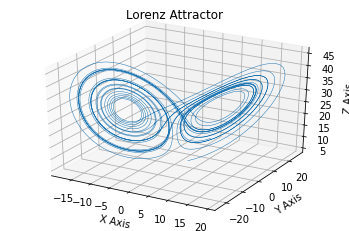

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(data_healthy[:,0], data_healthy[:,1], data_healthy[:,2],lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

Text(0.5, 0.92, 'Lorenz Attractor')

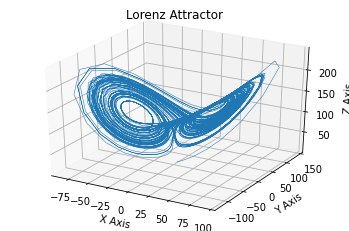

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(data_broken[:,0], data_broken[:,1], data_broken[:,2],lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

In [ ]:
data_healthy_fft = np.fft.fft(data_healthy).real
data_broken_fft = np.fft.fft(data_broken).real

In [ ]:
print (data_healthy_fft.shape)
print (data_healthy_fft)

(3000, 3)
[[ 9.42619266 -1.59309633 -1.59309633]
 [ 9.9036992  -1.6764064  -1.6764064 ]
 [10.43779318 -1.75331404 -1.75331404]
 ...
 [24.9690127  -5.47609496 -5.47609496]
 [25.97317526 -5.51210266 -5.51210266]
 [27.08054148 -5.56743205 -5.56743205]]


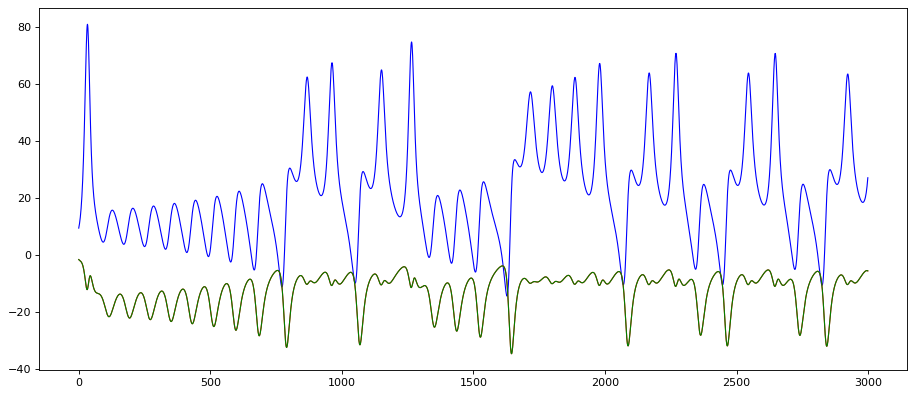

In [ ]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
ax.plot(range(0,size), data_healthy_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,1].real, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,2].real, '-', color='green', animated = True, linewidth=1)

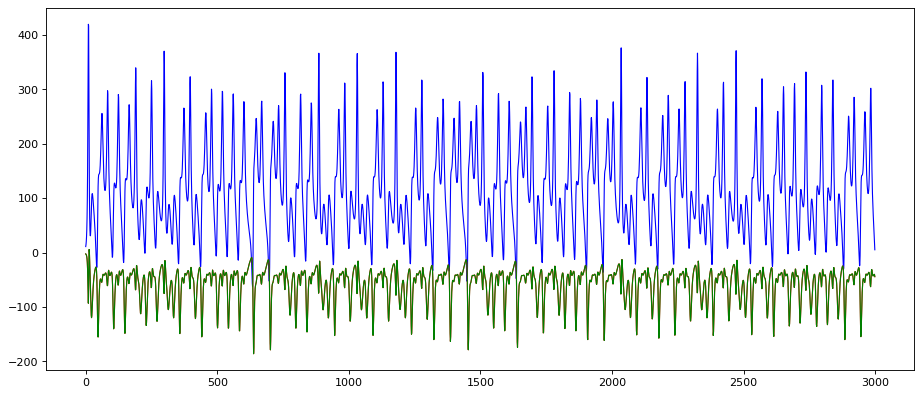

In [ ]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
ax.plot(range(0,size), data_broken_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,1].real, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,2].real, '-', color='green', animated = True, linewidth=1)

In [ ]:
def scaleData(data):
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)

In [ ]:
data_healthy_scaled = scaleData(data_healthy_fft)
data_broken_scaled = scaleData(data_broken_fft)

In [ ]:
data_healthy_scaled = data_healthy_scaled.T
data_broken_scaled = data_broken_scaled.T

In [ ]:
data_healthy_scaled.reshape(3, 3000)
data_broken_scaled.reshape(3, 3000)

array([[0.15198831, 0.15926736, 0.1705979 , ..., 0.18128196, 0.15906354,
        0.13972883],
       [0.95790869, 0.95431429, 0.94972119, ..., 0.76231153, 0.75661709,
        0.73956562],
       [0.95790869, 0.95431429, 0.94972119, ..., 0.76231153, 0.75661709,
        0.73956562]])

In [ ]:
!rm -f rklib.py
!wget https://raw.githubusercontent.com/IBM/coursera/master/rklib.py

--2021-12-15 04:38:15--  https://raw.githubusercontent.com/IBM/coursera/master/rklib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2540 (2.5K) [text/plain]
Saving to: ‘rklib.py’

rklib.py            100%[===================>]   2.48K  --.-KB/s    in 0s      

2021-12-15 04:38:15 (36.3 MB/s) - ‘rklib.py’ saved [2540/2540]



In [ ]:
from rklib import submit, submitAll
key = "4vkB9vnrEee8zg4u9l99rA"
all_parts = ["O5cR9","0dXlH","ZzEP8"]

email = "veer.vsps@gmail.com"

In [ ]:
#### your code here ###
dim = 3000 #### your code here ###
samples = 3 #### your code here ###

In [ ]:
part = "O5cR9"
token = "RxaMRt4FqYJzIuyR"  #### your code here ### (have a look here if you need more information on how to obtain the token https://youtu.be/GcDo0Rwe06U?t=276)

parts_data = {}
parts_data["0dXlH"] = json.dumps({"number_of_neurons_layer1": 0, "number_of_neurons_layer2": 0, "number_of_neurons_layer3": 0, "number_of_epochs": 0})
parts_data["O5cR9"] = json.dumps({"dim": dim, "samples": samples})
parts_data["ZzEP8"] = None 


submitAll(email, token, key, parts_data) 

Submission successful, please check on the coursera grader page for the status
-------------------------
{"elements":[{"itemId":"MsJRK","id":"tE4j0qhMEeecqgpT6QjMdA~MsJRK~0fRhkV1gEeyxmQ5Md6n_UQ","courseId":"tE4j0qhMEeecqgpT6QjMdA"}],"paging":{},"linked":{}}
-------------------------


In [ ]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [ ]:
number_of_neurons_layer1 = 3000
number_of_neurons_layer2 = 600
number_of_neurons_layer3 = 1
number_of_epochs = 20

In [ ]:
parts_data = {}
parts_data["0dXlH"] = json.dumps({"number_of_neurons_layer1": number_of_neurons_layer1, "number_of_neurons_layer2": number_of_neurons_layer2, "number_of_neurons_layer3": number_of_neurons_layer3, "number_of_epochs": number_of_epochs})
parts_data["O5cR9"] = json.dumps({"dim": dim, "samples": samples})
parts_data["ZzEP8"] = None 
                                 
                            
token = "RxaMRt4FqYJzIuyR"

#submitAll("veer.vsps@gmail.com", "RxaMRt4FqYJzIuyR", key, parts_data)
submitAll(email, token, key, parts_data)

Submission successful, please check on the coursera grader page for the status
-------------------------
{"elements":[{"itemId":"MsJRK","id":"tE4j0qhMEeecqgpT6QjMdA~MsJRK~0mTWn11gEeyluxL3sRub1w","courseId":"tE4j0qhMEeecqgpT6QjMdA"}],"paging":{},"linked":{}}
-------------------------


In [ ]:
# design network
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(dim, ), activation='relu'))
model.add(Dense(number_of_neurons_layer2, activation='relu'))
model.add(Dense(number_of_neurons_layer3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=sgd)

def train(data,label):
    #model.fit(#### your code here ###, #### your code here ###, epochs=number_of_epochs, batch_size=72, validation_data=(data, label), verbose=0, shuffle=True,callbacks=[lr])
    model.fit(data, label, epochs=number_of_epochs, batch_size=72, validation_data=(data, label), verbose=0, shuffle=True,callbacks=[lr])

def score(data):
    return model.predict(data)

In [ ]:
label_healthy = np.repeat(1,3)
label_healthy.shape = (3,1)
label_broken = np.repeat(0,3)
label_broken.shape = (3,1)

train_healthy = np.hstack((data_healthy_scaled,label_healthy))
train_broken = np.hstack((data_broken_scaled,label_broken))
train_both = np.vstack((train_healthy,train_broken))

In [ ]:
pd.DataFrame(train_healthy)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,0.250133,0.255146,0.260753,0.267016,0.274003,0.281791,0.290462,0.300109,0.310834,0.322747,0.335968,0.350626,0.366860,0.384812,0.404633,0.426471,0.450471,0.476764,0.505455,0.536612,0.570248,0.606294,0.644576,0.684788,0.726457,0.768923,0.811314,0.852549,0.891355,0.926317,0.955963,0.978882,0.993854,1.000000,0.996892,0.984626,0.963831,0.935599,0.901366,0.862754,...,0.388408,0.384141,0.38010,0.376279,0.372672,0.369275,0.366085,0.363101,0.360323,0.357753,0.355393,0.353248,0.351322,0.349622,0.348157,0.346934,0.345965,0.345261,0.344837,0.344708,0.344889,0.345402,0.346265,0.347504,0.349142,0.351209,0.353734,0.356753,0.360301,0.364419,0.369150,0.374541,0.380644,0.387513,0.395205,0.403782,0.413308,0.423850,0.435476,1.0
1,1.000000,0.997476,0.995146,0.992915,0.990694,0.988398,0.985940,0.983234,0.980193,0.976722,0.972724,0.968092,0.962715,0.956473,0.949240,0.940884,0.931276,0.920289,0.907808,0.893747,0.878056,0.860744,0.841901,0.821726,0.800544,0.778836,0.757249,0.736588,0.717794,0.701885,0.689866,0.682609,0.680731,0.684465,0.693583,0.707373,0.724692,0.744094,0.764001,0.782890,...,0.771464,0.775010,0.77872,0.782571,0.786539,0.790602,0.794740,0.798932,0.803162,0.807412,0.811667,0.815913,0.820137,0.824325,0.828468,0.832552,0.836569,0.840506,0.844355,0.848104,0.851744,0.855263,0.858649,0.861891,0.864975,0.867886,0.870609,0.873125,0.875415,0.877457,0.879227,0.880696,0.881835,0.882609,0.882982,0.882912,0.882356,0.881265,0.879589,1.0
2,1.000000,0.997476,0.995146,0.992915,0.990694,0.988398,0.985940,0.983234,0.980193,0.976722,0.972724,0.968092,0.962715,0.956473,0.949240,0.940884,0.931276,0.920289,0.907808,0.893747,0.878056,0.860744,0.841901,0.821726,0.800544,0.778836,0.757249,0.736588,0.717794,0.701885,0.689866,0.682609,0.680731,0.684465,0.693583,0.707373,0.724692,0.744094,0.764001,0.782890,...,0.771464,0.775010,0.77872,0.782571,0.786539,0.790602,0.794740,0.798932,0.803162,0.807412,0.811667,0.815913,0.820137,0.824325,0.828468,0.832552,0.836569,0.840506,0.844355,0.848104,0.851744,0.855263,0.858649,0.861891,0.864975,0.867886,0.870609,0.873125,0.875415,0.877457,0.879227,0.880696,0.881835,0.882609,0.882982,0.882912,0.882356,0.881265,0.879589,1.0


In [ ]:
pd.DataFrame(train_broken)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,0.151988,0.159267,0.170598,0.188207,0.215687,0.25888,0.327175,0.434534,0.596514,0.810387,1.000000,0.994187,0.760566,0.511737,0.352569,0.263539,0.215301,0.193540,0.193395,0.212421,0.245584,0.283850,0.317417,0.340348,0.351816,0.353946,0.349443,0.340539,0.328842,0.315446,0.301054,0.286059,0.270604,0.254634,0.237925,0.22012,0.200766,0.179394,0.155703,0.129965,...,0.666323,0.664009,0.636611,0.592496,0.543162,0.497154,0.458300,0.427124,0.402729,0.383972,0.369977,0.360293,0.354911,0.354269,0.359292,0.371459,0.392889,0.426328,0.474761,0.540014,0.619348,0.699841,0.755064,0.756015,0.697791,0.608081,0.519704,0.448215,0.394479,0.354053,0.322272,0.295635,0.271778,0.249154,0.226781,0.204146,0.181282,0.159064,0.139729,0.0
1,0.957909,0.954314,0.949721,0.942610,0.930689,0.91001,0.873657,0.810554,0.708197,0.572845,0.484761,0.600901,0.867722,1.000000,0.968977,0.879797,0.786344,0.697469,0.608409,0.517444,0.432767,0.370849,0.346355,0.361608,0.406079,0.464639,0.525079,0.580472,0.628150,0.667936,0.700784,0.727980,0.750751,0.770105,0.786778,0.80122,0.813559,0.823481,0.829962,0.830724,...,0.685067,0.700697,0.725120,0.748040,0.761671,0.765071,0.762106,0.757461,0.754359,0.754188,0.756982,0.762017,0.768232,0.774434,0.779327,0.781443,0.778997,0.769814,0.751552,0.722831,0.686162,0.652649,0.643340,0.675327,0.736243,0.788406,0.808244,0.800853,0.782189,0.764253,0.752342,0.747264,0.747707,0.751641,0.756913,0.761310,0.762312,0.756617,0.739566,0.0
2,0.957909,0.954314,0.949721,0.942610,0.930689,0.91001,0.873657,0.810554,0.708197,0.572845,0.484761,0.600901,0.867722,1.000000,0.968977,0.879797,0.786344,0.697469,0.608409,0.517444,0.432767,0.370849,0.346355,0.361608,0.406079,0.464639,0.525079,0.580472,0.628150,0.667936,0.700784,0.727980,0.750751,0.770105,0.786778,0.80122,0.813559,0.823481,0.829962,0.830724,...,0.685067,0.700697,0.725120,0.748040,0.761671,0.765071,0.762106,0.757461,0.754359,0.754188,0.756982,0.762017,0.768232,0.774434,0.779327,0.781443,0.778997,0.769814,0.751552,0.722831,0.686162,0.652649,0.643340,0.675327,0.736243,0.788406,0.808244,0.800853,0.782189,0.764253,0.752342,0.747264,0.747707,0.751641,0.756913,0.761310,0.762312,0.756617,0.739566,0.0


In [ ]:
pd.DataFrame(train_both)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,0.250133,0.255146,0.260753,0.267016,0.274003,0.281791,0.290462,0.300109,0.310834,0.322747,0.335968,0.350626,0.366860,0.384812,0.404633,0.426471,0.450471,0.476764,0.505455,0.536612,0.570248,0.606294,0.644576,0.684788,0.726457,0.768923,0.811314,0.852549,0.891355,0.926317,0.955963,0.978882,0.993854,1.000000,0.996892,0.984626,0.963831,0.935599,0.901366,0.862754,...,0.388408,0.384141,0.380100,0.376279,0.372672,0.369275,0.366085,0.363101,0.360323,0.357753,0.355393,0.353248,0.351322,0.349622,0.348157,0.346934,0.345965,0.345261,0.344837,0.344708,0.344889,0.345402,0.346265,0.347504,0.349142,0.351209,0.353734,0.356753,0.360301,0.364419,0.369150,0.374541,0.380644,0.387513,0.395205,0.403782,0.413308,0.423850,0.435476,1.0
1,1.000000,0.997476,0.995146,0.992915,0.990694,0.988398,0.985940,0.983234,0.980193,0.976722,0.972724,0.968092,0.962715,0.956473,0.949240,0.940884,0.931276,0.920289,0.907808,0.893747,0.878056,0.860744,0.841901,0.821726,0.800544,0.778836,0.757249,0.736588,0.717794,0.701885,0.689866,0.682609,0.680731,0.684465,0.693583,0.707373,0.724692,0.744094,0.764001,0.782890,...,0.771464,0.775010,0.778720,0.782571,0.786539,0.790602,0.794740,0.798932,0.803162,0.807412,0.811667,0.815913,0.820137,0.824325,0.828468,0.832552,0.836569,0.840506,0.844355,0.848104,0.851744,0.855263,0.858649,0.861891,0.864975,0.867886,0.870609,0.873125,0.875415,0.877457,0.879227,0.880696,0.881835,0.882609,0.882982,0.882912,0.882356,0.881265,0.879589,1.0
2,1.000000,0.997476,0.995146,0.992915,0.990694,0.988398,0.985940,0.983234,0.980193,0.976722,0.972724,0.968092,0.962715,0.956473,0.949240,0.940884,0.931276,0.920289,0.907808,0.893747,0.878056,0.860744,0.841901,0.821726,0.800544,0.778836,0.757249,0.736588,0.717794,0.701885,0.689866,0.682609,0.680731,0.684465,0.693583,0.707373,0.724692,0.744094,0.764001,0.782890,...,0.771464,0.775010,0.778720,0.782571,0.786539,0.790602,0.794740,0.798932,0.803162,0.807412,0.811667,0.815913,0.820137,0.824325,0.828468,0.832552,0.836569,0.840506,0.844355,0.848104,0.851744,0.855263,0.858649,0.861891,0.864975,0.867886,0.870609,0.873125,0.875415,0.877457,0.879227,0.880696,0.881835,0.882609,0.882982,0.882912,0.882356,0.881265,0.879589,1.0
3,0.151988,0.159267,0.170598,0.188207,0.215687,0.258880,0.327175,0.434534,0.596514,0.810387,1.000000,0.994187,0.760566,0.511737,0.352569,0.263539,0.215301,0.193540,0.193395,0.212421,0.245584,0.283850,0.317417,0.340348,0.351816,0.353946,0.349443,0.340539,0.328842,0.315446,0.301054,0.286059,0.270604,0.254634,0.237925,0.220120,0.200766,0.179394,0.155703,0.129965,...,0.666323,0.664009,0.636611,0.592496,0.543162,0.497154,0.458300,0.427124,0.402729,0.383972,0.369977,0.360293,0.354911,0.354269,0.359292,0.371459,0.392889,0.426328,0.474761,0.540014,0.619348,0.699841,0.755064,0.756015,0.697791,0.608081,0.519704,0.448215,0.394479,0.354053,0.322272,0.295635,0.271778,0.249154,0.226781,0.204146,0.181282,0.159064,0.139729,0.0
4,0.957909,0.954314,0.949721,0.942610,0.930689,0.910010,0.873657,0.810554,0.708197,0.572845,0.484761,0.600901,0.867722,1.000000,0.968977,0.879797,0.786344,0.697469,0.608409,0.517444,0.432767,0.370849,0.346355,0.361608,0.406079,0.464639,0.525079,0.580472,0.628150,0.667936,0.700784,0.727980,0.750751,0.770105,0.786778,0.801220,0.813559,0.823481,0.829962,0.830724,...,0.685067,0.700697,0.725120,0.748040,0.761671,0.765071,0.762106,0.757461,0.754359,0.754188,0.756982,0.762017,0.768232,0.774434,0.779327,0.781443,0.778997,0.769814,0.751552,0.722831,0.686162,0.652649,0.643340,0.675327,0.736243,0.788406,0.808244,0.800853,0.782189,0.764253,0.752342,0.747264,0.747707,0.751641,0.756913,0.761310,0.762312,0.756617,0.739566,0.0
5,0.957909,0.954314,0.949721,0.942610,0.930689,0.910010,0.873657,0.810554,0.7081

In [ ]:
features = train_both[:, 0:3000] #### your code here ###]
labels = train_both[:, 3000] #### your code here ###]

In [ ]:
train(features,labels)

0.675321102142334, 0.6033408641815186, 0.5473189949989319, 0.4992380440235138, 0.45796942710876465, 0.4206394851207733, 0.3866417706012726, 0.3562032878398895, 0.3285171091556549, 0.30378928780555725, 0.2813888490200043, 0.26126325130462646, 0.24502837657928467, 0.2294471114873886, 0.21602793037891388, 0.20295648276805878, 0.19124771654605865, 0.17969267070293427, 0.16906434297561646, 0.15946394205093384, 

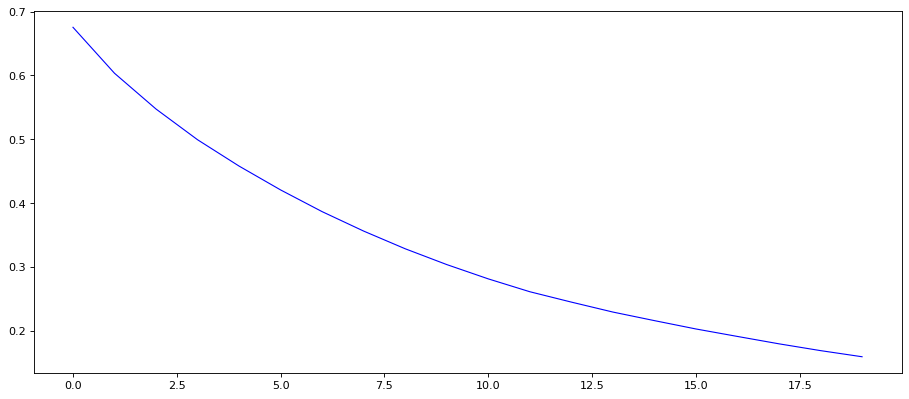

In [ ]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(lr.losses)
ax.plot(range(0,size), lr.losses, '-', color='blue', animated = True, linewidth=1)

In [ ]:
score(data_healthy_scaled)

array([[0.8285488 ],
       [0.91171026],
       [0.91171026]], dtype=float32)

In [ ]:
score(data_broken_scaled)

array([[0.22893389],
       [0.1270063 ],
       [0.1270063 ]], dtype=float32)

In [ ]:
parts_data = {}
parts_data["0dXlH"] = json.dumps({"number_of_neurons_layer1": number_of_neurons_layer1, "number_of_neurons_layer2": number_of_neurons_layer2, "number_of_neurons_layer3": number_of_neurons_layer3, "number_of_epochs": number_of_epochs})
parts_data["O5cR9"] = json.dumps({"dim": dim, "samples": samples})

                                 
                                 
token = "RxaMRt4FqYJzIuyR" #### your code here ###

In [ ]:
prediction = str(np.sum(score(data_healthy_scaled))/3)
myData={'healthy' : prediction}
myData
parts_data["ZzEP8"] = json.dumps(myData)
submitAll(email, token, key, parts_data)

Submission successful, please check on the coursera grader page for the status
-------------------------
{"elements":[{"itemId":"MsJRK","id":"tE4j0qhMEeecqgpT6QjMdA~MsJRK~1rljLV1gEeyXWgqcgCxPIw","courseId":"tE4j0qhMEeecqgpT6QjMdA"}],"paging":{},"linked":{}}
-------------------------
